In [42]:
import pandas as pd
import seaborn as sns

# Introduction

This notebook presents an exploratory analysis of GHG emissions data provided by ADEME through BEGES database.

Data used in this notebook is stored in this repository git, whoch contains more details on data sources: https://github.com/OpenGeoScales/ogs-data-exploration/tree/main/data/ghg-emissions/ademe

Five csv datasets are obtained:
- assessments.csv
- emissions.csv
- legal_units.csv
- scope_items.csv
- texts.csv

In [72]:
# Load ademe data from github repository

# assessments.csv
url = 'https://raw.githubusercontent.com/OpenGeoScales/ogs-data-exploration/main/data/ghg-emissions/ademe/beges/assessments.csv'
assessements = pd.read_csv(url, index_col=0)

# assessments.csv
url = 'https://raw.githubusercontent.com/OpenGeoScales/ogs-data-exploration/main/data/ghg-emissions/ademe/beges/emissions.csv'
emissions = pd.read_csv(url, index_col=0)

# legal_units.csv
url = 'https://raw.githubusercontent.com/OpenGeoScales/ogs-data-exploration/main/data/ghg-emissions/ademe/beges/legal_units.csv'
legal_units = pd.read_csv(url, index_col=0)

# scope_items.csv
url = 'https://raw.githubusercontent.com/OpenGeoScales/ogs-data-exploration/main/data/ghg-emissions/ademe/beges/scope_items.csv'
scope_items = pd.read_csv(url, index_col=0)

# texts.csv
url = 'https://raw.githubusercontent.com/OpenGeoScales/ogs-data-exploration/main/data/ghg-emissions/ademe/beges/texts.csv'
texts = pd.read_csv(url, index_col=0)

In [73]:
assessements.head(3)

,organization_name,organization_description,organization_type,collectivity_type,staff,population,consolidation_method,reporting_year,total_scope_1,total_scope_2,total_scope_3,reference_year,action_plan,reductions_scope_1_2,reductions_scope_1,reductions_scope_2,reductions_scope_3,is_draft,source_url
id,,,,,,,,,,,,,,,,,,,
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.00,2170.00,59931.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
2,ADIDAS France,ADIDAS France est une entreprise de distributi...,Entreprise,NaN,768.0,NaN,Opérationnel,2011,786.19,516.26,1164.09,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
3,CROUS Nice-Toulon,Les activités gérées par le CROUS de Nice-Toul...,Etablissement public,NaN,261.0,NaN,Opérationnel,2011,824.00,382.00,0.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...


In [83]:
emissions.head(20)

,type,scope_item_id,co2,ch4,n2o,other,total,co2_biogenic
assessment_id,,,,,,,,
1,Déclaration,1,624.00,1.00,3.00,0.0,628.00,0.0
1,Déclaration,2,4565.00,2.00,42.00,0.0,4609.00,266.0
1,Déclaration,3,0.00,0.00,0.00,0.0,0.00,0.0
1,Déclaration,4,0.00,0.00,0.00,780.0,780.00,0.0
1,Déclaration,5,0.00,0.00,0.00,0.0,0.00,0.0
1,Déclaration,6,NaN,NaN,NaN,NaN,2170.00,0.0
1,Déclaration,7,NaN,NaN,NaN,NaN,NaN,0.0
1,Déclaration,8,NaN,NaN,NaN,NaN,1855.00,NaN
1,Déclaration,9,NaN,NaN,NaN,NaN,13221.00,NaN


In [55]:
legal_units.head(3)

,legal_unit_id_type,legal_unit_id
assessment_id,,
1,SIREN,775709702
2,SIREN,85480069
3,SIREN,180600041


In [84]:
scope_items.head(10)

,label,scope_id,scope_label
id,,,
1,Emissions directes des sources fixes de combus...,1,Emissions directes
2,Emissions directes des sources mobiles à moteu...,1,Emissions directes
3,Emissions directes des procédés hors énergie,1,Emissions directes
4,Emissions directes fugitives,1,Emissions directes
5,Emissions issues de la biomasse (sols et forêts),1,Emissions directes
6,Emissions indirectes liées à la consommation d...,2,Emissions indirectes associées à l'énergie
7,Emissions indirectes liées à la consommation d...,2,Emissions indirectes associées à l'énergie
8,Autres émissions liées à l'énergie,3,Autres émissions indirectes
9,Achats de produits et de services,3,Autres émissions indirectes


In [57]:
texts.head(3)

,key,value
assessment_id,,
1,Méthodologie Exclusions,<p>Les postes d’émissions exclus du périmètre ...
1,Méthodologie Incertitudes,<p>Les 41% d’incertitudes sur le résultat tota...
1,Méthodologie Recalcul,<p>Aucun recalcul pour le premier bilan.</p>


# Assessment dataset

In [22]:
# Get df shape
row, col = assessemnts.shape
print(row)
print(col)

3271
19


Les données contiennent `3271` enregistrements d'inventaires d'émissions concernant différents types d'organismes

In [10]:
# Distribution of organization types
assessemnts.groupby(['organization_type']).size()

organization_type
Association                                86
Collectivité territoriale (dont EPCI)     269
Entreprise                               2069
Etablissement public                      737
Etat                                      110
dtype: int64

## Join assessement with emissions by gas

We will `assessments` dataset with `emissions` dataset in order to get the emission per gas 

In [77]:
# Add id column for join
#assessemnts["id"] = assessemnts.index

# left join emissions
#assessemnts_emissions = pd.merge(assessemnts,emissions, left_on = "id",right_on='assessment_id')

assessemnts_emissions = pd.merge(assessemnts, emissions, left_index=True, right_index=True)

In [79]:
assessemnts_emissions.head(10)

,organization_name,organization_description,organization_type,collectivity_type,staff,population,consolidation_method,reporting_year,total_scope_1,total_scope_2,...,source_url,id,type,scope_item_id,co2,ch4,n2o,other,total,co2_biogenic
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,1,624.0,1.0,3.0,0.0,628.0,0.0
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,2,4565.0,2.0,42.0,0.0,4609.0,266.0
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,3,0.0,0.0,0.0,0.0,0.0,0.0
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,4,0.0,0.0,0.0,780.0,780.0,0.0
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,5,0.0,0.0,0.0,0.0,0.0,0.0
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,6,NaN,NaN,NaN,NaN,2170.0,0.0
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,7,NaN,NaN,NaN,NaN,NaN,0.0
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,8,NaN,NaN,NaN,NaN,1855.0,NaN
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,9,NaN,NaN,NaN,NaN,13221.0,NaN
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.0,2170.0,...,http://www.bilans-ges.ademe.fr/fr/bilanenligne...,1,Déclaration,10,NaN,NaN,NaN,NaN,23536.0,NaN


# Emissions des collectivitées territoriales

Les données de l'ADEME concernent plusieurs types d'organisations: Association, collectivités territoriales, entreprises, établissement publiques...
Nous allons focaliser dans cette analyse sur les données d'émissions qui concernent les collectivités territoriales.

In [47]:
# Selecting municipality data
ademe_beges_assessement_collectivite = ademe_beges_assessemnt[ademe_beges_assessemnt['organization_type'] =='Collectivité territoriale (dont EPCI)']
ademe_beges_assessement_collectivite.head()

,organization_name,organization_description,organization_type,collectivity_type,staff,population,consolidation_method,reporting_year,total_scope_1,total_scope_2,total_scope_3,reference_year,action_plan,reductions_scope_1_2,reductions_scope_1,reductions_scope_2,reductions_scope_3,is_draft,source_url
id,,,,,,,,,,,,,,,,,,,
4,Fort de France,NaN,Collectivité territoriale (dont EPCI),Communes,3000.0,94000.0,NaN,2010,19811.00,0.00,48674.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
5,concarneau Cornouaille Agglomération,NaN,Collectivité territoriale (dont EPCI),Communes,102.0,49000.0,NaN,2011,977.16,113.10,0.00,NaN,Non,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
6,Communauté Urbaine d'Alençon,NaN,Collectivité territoriale (dont EPCI),Communes,733.0,57490.0,NaN,2012,3080.99,1485.18,7522.32,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
10,Communauté d'Agglomération de l'Espace Sud Mar...,NaN,Collectivité territoriale (dont EPCI),Communauté d'agglomération,210.0,123476.0,NaN,2012,2284.00,231.00,4271.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
17,Valenciennes Métropole,NaN,Collectivité territoriale (dont EPCI),Communauté d'agglomération,149.0,192000.0,NaN,2011,2261.00,424.00,8634.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...


## Types de collectivité territoriale
Il existe plusieurs types de collectivités terriotirales spécifiés dans le champs `organization_name`:

In [48]:
# Distribution of collectivity_type	
ademe_beges_assessemnt_municipalities.groupby(['collectivity_type']).size()

collectivity_type
Communauté Urbaine            10
Communauté d'agglomération    75
Communauté de Commune         14
Communes                      73
Départements                  81
Métropole                      9
Régions                        7
dtype: int64

## Couverture spatiale

Les données concernent `238` collectivités territoriales:

In [34]:
# Spatial coverage: Number of municpalities
ademe_beges_assessemnt_municipalities['organization_name'].nunique()

238

## Couverture temporelle
Les données contiennent des inventaires d'émission allant de `2009` à `2020`.

In [40]:
# Temporal coverage: Number of considered years
print(ademe_beges_assessemnt_municipalities['reporting_year'].min())
print(ademe_beges_assessemnt_municipalities['reporting_year'].max())

2009
2020


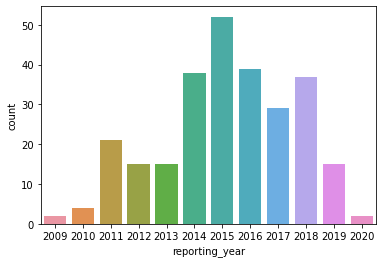

In [43]:
# plot number of reporting municipalitiees per year
ax = sns.countplot(x="reporting_year", data=ademe_beges_assessemnt_municipalities)

# Conclusion

Les traitements nécessaires pour utiliser et intégrer ces données:
- Le fichier présente des données à différentes échelles administratives *(Communauté Urbaine,Communauté d'agglomération,Communauté de Commune,Communes,Départements,Métropole, Régions)* . Il faudrait recoder la catégorsiation des échelles pour respecter une norme commune avec les autres données.
- les collectivités territoriales sont identiées à travers leurs noms. Il faudrait coiser avec un référentiel des codes administratifs pour pouvoir coroiser avec les coordonnées géographiques.